<a href="https://colab.research.google.com/github/aakashr30/ML-EXAM-2-DecsionTree-RandomForest-/blob/main/ML2_Exam(AAKASH_R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [324]:
import pandas as pd

In [325]:
data = pd.read_csv("/content/admission.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [326]:
data=data.drop(['Serial No.'],axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


**Q.1 Perform Exploratory Data Analysis (EDA) tasks **

a) Visualize the 10 random rows of the data set

In [327]:
data2= data.sample(n=10 , replace = True)
data2

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
7,308,101,2,3.0,4.0,7.90,0,0.68
473,316,102,2,4.0,3.5,8.15,0,0.67
455,305,102,2,1.5,2.5,7.64,0,0.59
172,322,110,4,4.0,5.0,9.13,1,0.86
483,304,103,5,5.0,3.0,7.92,0,0.71
458,312,100,1,3.0,3.0,8.53,1,0.69
301,319,108,2,2.5,3.0,8.76,0,0.66
49,327,111,4,3.0,4.0,8.40,1,0.78
8,302,102,1,2.0,1.5,8.00,0,0.50
61,307,101,3,4.0,3.0,8.20,0,0.47


b) Generate the description for numeric variables

In [328]:
 (data.sum(1))

0      479.57
1      454.13
2      439.22
3      451.47
4      432.86
        ...  
495    464.39
496    480.83
497    475.99
498    437.16
499    462.88
Length: 500, dtype: float64

c) Check the shape of the data set

In [329]:
data.shape

(500, 8)

d) Generate the correlation matrix

In [330]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


e) Generate a correlogram

In [331]:
import numpy as np
c = np.corrcoef(data)
print(c)

[[1.         0.99980902 0.99980461 ... 0.99991571 0.99979794 0.99998615]
 [0.99980902 1.         0.99999425 ... 0.9994833  0.99999153 0.99987695]
 [0.99980461 0.99999425 1.         ... 0.99947324 0.9999755  0.99986453]
 ...
 [0.99991571 0.9994833  0.99947324 ... 1.         0.99947763 0.99985407]
 [0.99979794 0.99999153 0.9999755  ... 0.99947763 1.         0.99987838]
 [0.99998615 0.99987695 0.99986453 ... 0.99985407 0.99987838 1.        ]]



**Q.2 Find out the minimum and maximum values for GRE 
score**

In [332]:
data['GRE Score'].values

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 314, 317, 319, 318, 303, 312, 325, 328, 334, 336, 340,
       322, 298, 295, 310, 300, 327, 338, 340, 331, 320, 299, 300, 304,
       307, 308, 316, 313, 332, 326, 322, 329, 339, 321, 327, 313, 312,
       334, 324, 322, 320, 316, 298, 300, 311, 309, 307, 304, 315, 325,
       325, 327, 316, 318, 328, 332, 336, 321, 314, 314, 329, 327, 301,
       296, 294, 312, 340, 320, 322, 340, 319, 315, 317, 314, 316, 318,
       299, 298, 301, 303, 304, 306, 331, 332, 323, 322, 312, 314, 317,
       326, 316, 329, 338, 331, 304, 305, 321, 301, 320, 311, 310, 299,
       290, 296, 327, 335, 334, 310, 308, 301, 300, 323, 319, 326, 333,
       339, 303, 309, 323, 333, 314, 312, 316, 326, 318, 329, 332, 331,
       340, 325, 320, 315, 326, 339, 311, 334, 332, 321, 324, 326, 312,
       315, 309, 306, 297, 315, 298, 318, 317, 329, 322, 302, 313, 293,
       311, 312, 334, 322, 323, 321, 320, 329, 319, 309, 307, 30

In [333]:
 max = data['GRE Score'].max()
 print("MAXIMUM OF GRE SCORE:",max)

MAXIMUM OF GRE SCORE: 340


In [334]:
 min = data['GRE Score'].min()
 print("Minimum OF GRE SCORE:",min)

Minimum OF GRE SCORE: 290


*Q.3 Find out the percentage of universities for each 
university rating *

In [335]:
z = data['University Rating'].values
z
e=5

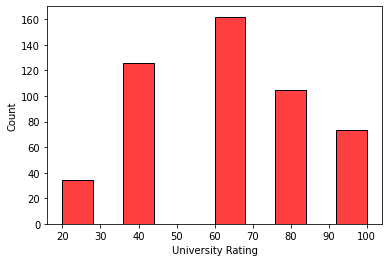

In [427]:
import seaborn as sns
sns.histplot(data['University Rating'],color = 'red')

In [336]:
for i in range(0,len(z)):
  z[i]=(z[i]/e)*100

In [337]:
z

array([ 80,  80,  60,  60,  40, 100,  60,  40,  20,  60,  60,  80,  80,
        60,  60,  60,  60,  60,  60,  60,  60,  80, 100, 100, 100, 100,
       100,  40,  20,  40,  40,  60,  80, 100, 100, 100,  40,  20,  20,
        40,  60,  40,  40,  80, 100, 100, 100, 100,  60,  80,  60,  40,
        80,  80,  60,  60,  60,  40,  20,  40,  40,  60,  40,  40,  60,
        80,  60,  40,  60,  80, 100, 100, 100,  80,  60,  40,  60,  40,
        40,  20,  60,  80, 100, 100, 100,  80,  60,  40,  60,  80,  40,
        60,  40,  40,  60,  80,  40,  60,  80,  60,  60,  40,  40,  40,
        60,  60,  80,  80, 100, 100, 100,  80,  60,  40,  60,  80,  60,
        80,  40, 100, 100, 100,  80,  60,  80,  60,  60,  60,  60, 100,
       100, 100, 100, 100, 100,  80,  60,  40,  40,  20,  40,  40, 100,
        80,  40,  40,  60,  60,  80,  40,  80, 100, 100,  60,  60,  60,
        60,  40,  40,  20,  20,  20,  60,  60,  80, 100,  60,  60,  40,
        40,  40, 100,  80,  80,  80,  80,  80,  60,  60,  60,  6

**Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :

Students having the “Chance of Admit” value > 0.80, are assigned value 1, and
Students having the “Chance of Admit” value < 0.80, are assigned value 0
Where 0: Low chance of Admission and 1: High chance of admission**

In [338]:
z=data['Chance of Admit '].values
z

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [339]:
for i in range(0,len(z)):
  if(z[i]>0.80):
    z[i]=1
  elif(z[i]<=0.80):
    z[i]=0

In [340]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,80,4.5,4.5,9.65,1,1.0
1,324,107,80,4.0,4.5,8.87,1,0.0
2,316,104,60,3.0,3.5,8.00,1,0.0
3,322,110,60,3.5,2.5,8.67,1,0.0
4,314,103,40,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
495,332,108,100,4.5,4.0,9.02,1,1.0
496,337,117,100,5.0,5.0,9.87,1,1.0
497,330,120,100,4.5,5.0,9.56,1,1.0
498,312,103,80,4.0,5.0,8.43,0,0.0


**Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.**

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [342]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,62.280000,3.374000,3.48400,8.576440,0.560000,0.284000
std,11.295148,6.081868,22.870236,0.991004,0.92545,0.604813,0.496884,0.451388
min,290.000000,92.000000,20.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,40.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,60.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,80.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,100.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [343]:
x=data.drop(['Chance of Admit '],axis=1).values
y=data['Chance of Admit '].values

In [344]:
from sklearn.model_selection import train_test_split

In [345]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [351]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [352]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pre = model.predict(x_test)
model.predict_proba(x_test)

In [354]:
from  sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [356]:
accuracy_score(y_test,pre)

0.96

In [357]:
confusion_matrix(y_test,pre)

array([[92,  3],
       [ 2, 28]])

In [361]:
m = classification_report(y_test,pre)
print(m)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97        95
         1.0       0.90      0.93      0.92        30

    accuracy                           0.96       125
   macro avg       0.94      0.95      0.95       125
weighted avg       0.96      0.96      0.96       125



In [362]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [363]:
pca=decomposition.PCA()
sc=StandardScaler()

In [364]:
df=tree.DecisionTreeClassifier()

In [365]:
pipe=Pipeline(steps=[('sc',sc),('pca',pca),('df',df)])

In [366]:
n_components=list(range(1,x.shape[1]+1,1))

In [367]:
criterion=['gini','entropy']
max_depth=[1,2,3,4,5]

In [373]:
p=dict(pca__n_components=n_components,df__criterion=criterion,df__max_depth=max_depth)

In [374]:
clf=GridSearchCV(pipe,p)

In [375]:
clf.fit(x,y)

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('df', DecisionTreeClassifier())]),
             param_grid={'df__criterion': ['gini', 'entropy'],
                         'df__max_depth': [1, 2, 3, 4, 5],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7]})

In [376]:
print('Best max_depth: ',clf.best_estimator_.get_params()['df__max_depth'])


Best max_depth:  1


In [377]:
print('Best Criterion: ',clf.best_estimator_.get_params()['df__criterion'])

Best Criterion:  gini


In [378]:
print(clf.best_estimator_.get_params()['df'])

DecisionTreeClassifier(max_depth=1)


In [379]:
CV_result=cross_val_score(clf,x,y,cv=4, n_jobs=-1)

In [380]:
print(CV_result)
print(CV_result.mean())
print(CV_result.std())


[0.944 0.904 0.888 0.936]
0.9179999999999999
0.022891046284519184


In [384]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [387]:
y_proba=model.predict_proba(x_test)
y_predicted=y_proba[:,1]

In [388]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [417]:
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.9933333333333334


Text(0, 0.5, 'True Positive Rate(sensitivity')

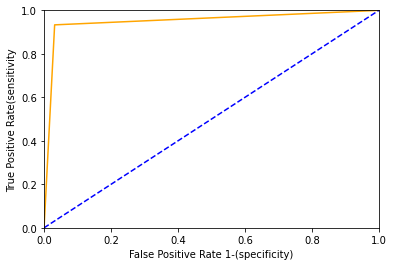

In [391]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',label='ROC'%roc_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate 1-(specificity)')
plt.ylabel('True Positive Rate(sensitivity')

**Q.6 Build a Random Forest classifier, to predict whether a 
student has a low or high chance of admission to a chosen 
university**

In [392]:
from sklearn.ensemble import RandomForestClassifier


In [393]:
model = RandomForestClassifier()

In [394]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [396]:
pre = model.predict(x_test)

In [397]:
accuracy_score(y_test,pre)

0.96

In [398]:
confusion_matrix(y_test,pre)

array([[92,  3],
       [ 2, 28]])

In [403]:
c = classification_report(y_test,pre)
print(c)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97        95
         1.0       0.90      0.93      0.92        30

    accuracy                           0.96       125
   macro avg       0.94      0.95      0.95       125
weighted avg       0.96      0.96      0.96       125



In [404]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [405]:
y_proba=model.predict_proba(x_test)
y_predicted=y_proba[:,1]

In [406]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [407]:
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.9933333333333334


Text(0, 0.5, 'True Positive Rate(sensitivity')

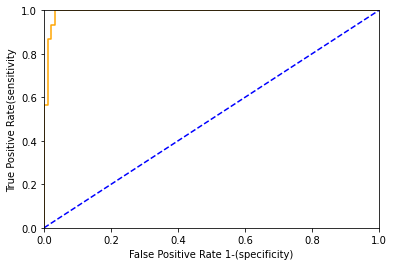

In [408]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',label='ROC'%roc_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate 1-(specificity)')
plt.ylabel('True Positive Rate(sensitivity')

**Q.7 Also use Ensemble Modelling techniques, to predict 
whether a student has a low or high chance of admission 
to a chosen university**

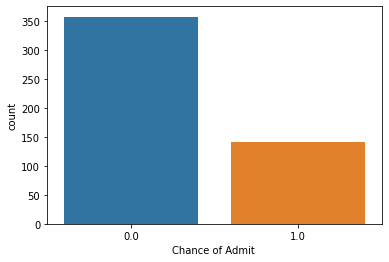

In [414]:
#Generate a count plot for the target variable (Chance of Admit )
# 0 is low chance of admit and 1 is high chance of admit
import seaborn as sns
sns.countplot(x='Chance of Admit ',data=data)

In [428]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

log_classifier =  LogisticRegression()
sv_classifier = SVC()
sgd_classifier = SGDClassifier()


def classifiers(clf1, clf2, clf3, x_train,y_train):
    clfs = [clf1, clf2, clf3]
    all_clfs_acc = []
    for clf in clfs:
        clf.fit(xtrain, ytrain)
        preds = clf.predict(xtrain)
        acc = accuracy_score(ytrain,preds)
        acc = acc.tolist()
        all_clfs_acc.append(acc)
    return all_clfs_acc

In [429]:
import warnings
warnings.filterwarnings('ignore')

In [432]:
classifiers(log_classifier,sv_classifier, sgd_classifier, xtrain, ytrain)


[0.895, 0.8275, 0.815]

In [433]:
from sklearn.ensemble import VotingClassifier

vot_classifier = VotingClassifier(
    
    estimators=[('log_reg', log_classifier),
                ('svc', sv_classifier),
                ('sgd', sgd_classifier)], 
    voting='hard')

vot_classifier.fit(xtrain, ytrain)

VotingClassifier(estimators=[('log_reg', LogisticRegression()), ('svc', SVC()),
                             ('sgd', SGDClassifier())])

**Q.8 Compare all of the models and justify your choice about 
the optimum model.**

In [ ]:
Model = DecisionTreeClassifier